In [1]:
import numpy as np
x_train = np.load('Training_data.npy',allow_pickle = True)
x_train = x_train.astype('float32')
y_train = np.load('Training_label.npy')

In [2]:
print(x_train.shape)
x_train[0].shape

(37330, 7)


(7,)

In [3]:
x_train[0]

array([ 0. ,  5. , 61. ,  0. ,  5.1, 59. ,  0. ], dtype=float32)

In [3]:
import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(7, input_shape=(7,), activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,209
Trainable params: 1,209
Non-trainable params: 0
_________________________________________________________________


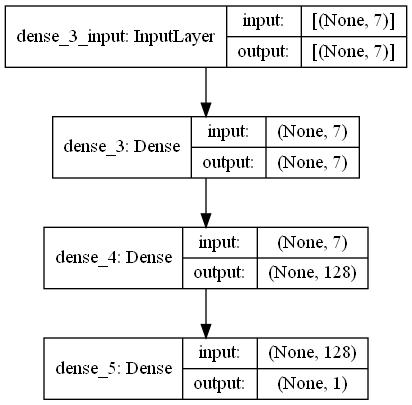

In [7]:
import pydot
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
model.compile(loss="mean_absolute_error",optimizer="adam")

In [9]:
model_history=model.fit(x_train,y_train,epochs=50,validation_split=0.20)

Epoch 1/50
934/934 [==============================] - 5s 2ms/step - loss: 36.8995 - val_loss: 27.6022
Epoch 2/50
934/934 [==============================] - 2s 2ms/step - loss: 24.0539 - val_loss: 25.4667
Epoch 3/50
934/934 [==============================] - 2s 2ms/step - loss: 22.0458 - val_loss: 24.4307
Epoch 4/50
934/934 [==============================] - 2s 2ms/step - loss: 19.6945 - val_loss: 20.3632
Epoch 5/50
934/934 [==============================] - 2s 2ms/step - loss: 17.0712 - val_loss: 17.5196
Epoch 6/50
934/934 [==============================] - 2s 2ms/step - loss: 15.3765 - val_loss: 15.5125
Epoch 7/50
934/934 [==============================] - 2s 2ms/step - loss: 14.5898 - val_loss: 13.9925
Epoch 8/50
934/934 [==============================] - 2s 2ms/step - loss: 14.2084 - val_loss: 14.4471
Epoch 9/50
934/934 [==============================] - 2s 2ms/step - loss: 13.8625 - val_loss: 13.9133
Epoch 10/50
934/934 [==============================] - 2s 2ms/step - loss: 13.7423

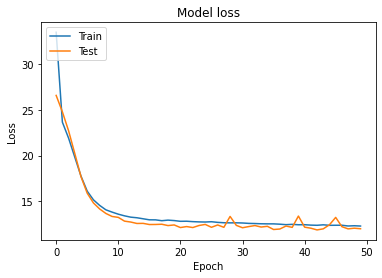

In [9]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
x_test = np.load('Testing_data.npy',allow_pickle = True)
x_test = x_test.astype('float32')
y_test = np.load('Testing_label.npy')

In [12]:
model.evaluate(x_test,y_test)

87/87 [==============================] - 0s 2ms/step - loss: 11.7933


11.793266296386719

In [13]:
model.save('Score_Prediction_100')

INFO:tensorflow:Assets written to: Score_Prediction_100\assets


In [14]:
test = x_test[100]
test = test[np.newaxis,:]
result = model.predict(test)
print(int(result[0][0]))
print(y_test[100])

155
157


In [17]:
test = np.array([2,3,68,2,5.1,40,1])
test = test[np.newaxis,:]
result = model.predict(test)
print(int(result[0][0]))

191
